# [一个实验学会线性回归](https://www.lanqiao.cn/courses/4855/learning/?id=189458)


## 介绍

线性回归是一种较为简单，但十分重要的机器学习方法。掌握线性的原理及求解方法，是深入了解线性回归的基本要求。除此之外，线性回归也是监督学习的基石，希望你能最终掌握机器学习的一些重要的思想。

## 知识点
- 一元线性回归
- 平方损失函数
- 最小二乘法及代数求解
- 最小二乘法的矩阵求解
- 线性回归综合案例

## 线性回归介绍

**回归问题旨在实现对连续值的预测，例如股票的价格、房价的趋势等**。比如，下方展现了一个房屋面积和价格的对应关系图。

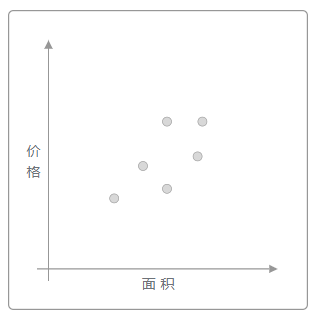

如上图所示，不同的房屋面积对应着不同的价格。现在，假设我手中有一套房屋想要出售，而出售时就需要预先对房屋进行估值。于是，我想通过上图，也就是其他房屋的售价来判断手中的房产价值是多少。应该怎么做呢？

我采用的方法是这样的。如下图所示，首先画了一条红色的直线，让其大致验证数据色点分布的延伸趋势。然后，我将已知房屋的面积大小对应到红色直线上，也就是蓝色点所在位置。最后，再找到蓝色点对应于房屋的价格作为房屋最终的预估价值。

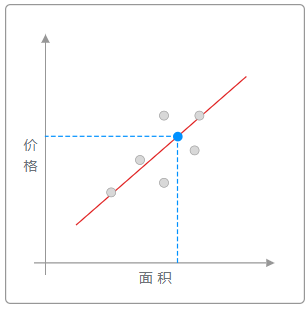

在上图呈现的这个过程中，通过找到一条直线去拟合数据点的分布趋势的过程，就是线性回归的过程。**而线性回归中的「线性」代指线性关系，也就是图中所绘制的红色直线。**

此时，你可能心中会有一个疑问。上图中的红色直线是怎么绘制出来的呢？为什么不可以像下图中另外两条绿色虚线，而偏偏要选择红色直线呢？

绿色虚线的确也能反应数据点的分布趋势。**所以，找到最适合的那一条红色直线，就成为了线性回归中需要解决的目标问题。**

通过上面这个小例子，相信你对线性回归已经有一点点印象了，至少大致明白它能做什么。接下来的内容中，我们将了解线性回归背后的数学原理，以及使用 Python 代码对其实现。

## 一元线性回归
上面针对  线性回归 的介绍内容中，我们列举了一个房屋面积与房价变化的例子。其中，房屋面积为自变量，而房价则为因变量。另外，**我们将只有 1 个自变量的线性拟合过程叫做一元线性回归。**

下面，我们就生成一组房屋面积和房价变化的示例数据。𝑥 为房屋面积，单位是平方米; 𝑦 为房价，单位是万元。

In [17]:
import numpy as np

x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

示例数据由 10 组房屋面积及价格对应组成。接下来，通过 Matplotlib 绘制数据点， 𝑥 ,  𝑦  分别对应着横坐标和纵坐标。

Text(0, 0.5, 'Price')

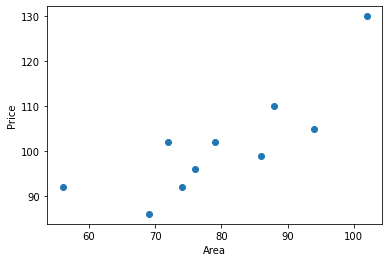

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(x,y)
plt.xlabel('Area')
plt.ylabel('Price')

如上面所说，线性回归即通过线性方程去拟合数据点。那么，我们可以令该 1 次函数的表达式为：

$$ y(x, w) = w_0 + w_1x \tag{1} $$

公式 $(1)$ 是典型的一元一次函数表达式，我们通过组合不同的 $w_0$ 和 $w_1$ 的值得到不同的拟合直线。

接下来，对公式 $(1)$ 进行代码实现：

In [37]:
def f(x:list,w0:float,w1:float):
    """ 一元一次函数表达式
    """
    y = w0 + w1*x
    return y

那么，哪一条直线最能反应出数据的变化趋势呢？

想要找出对数据集拟合效果最好的直线，这里再拿出上小节图示进行说明。如下图所示，当我们使用 $ y(x, w) = w_0 + w_1x $ 对数据进行拟合时，就能得到拟合的整体误差，即图中蓝色线段的长度总和。如果某一条直线对应的误差值最小，是不是就代表这条直线最能反映数据点的分布趋势呢？

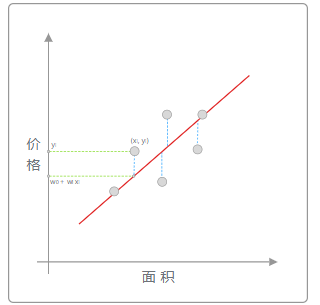

## 平方损失函数

正如上面所说，如果一个数据点为 ( 𝑥𝑖 ,  𝑦𝑖 )，那么它对应的误差就为:

$$y_{i}-(w_0 + w_1x_{i}) \tag{2}$$

上面的误差往往也称之为「残差」。但是在机器学习中，我们更喜欢称作「损失」，即真实值和预测值之间的偏离程度。那么，对 $n$ 个全部数据点而言，其对应的残差损失总和就为：

$$
\sum\limits_{i = 1}^n {{{(y_{i}-(w_0 + w_1x_{i}))}}} \tag{3}
$$

更进一步，在线性回归中，我们一般使用残差的平方和来表示所有样本点的误差。公式如下：

$$
\sum\limits_{i = 1}^n {{{(y_{i}-(w_0 + w_1x_{i}))}}^2} \tag{4}
$$

**使用残差平方和的好处在于能保证损失始终是累加的正数，而不会存在正负残差抵消的问题。**对于公式 $(4)$ 而言，机器学习中有一个专门的名词，那就是「平方损失函数」。而为了得到拟合参数 $w_0$ 和 $w_1$ 最优的数值，我们的目标就是让公式 $(4)$ 对应的平方损失函数最小。

同样，我们可以对公式 $(4)$ 进行代码实现：

In [20]:
def square_loss(x:np.ndarray,y: np.ndarray, w0:float, w1:float):
    """平方损失函数
    """
    loss = sum(np.square(y - (w0+w1*x)))
    return loss

如果某条直线拟合样本得到的总损失最小，那么这条直线就是最终想得到的结果。而求解损失最小值的过程，就必须用到下面的数学方法了。

## 最小二乘法代数求解

最小二乘法是用于求解线性回归拟合参数  𝑤  的一种常用方法。最小二乘法中的「二乘」代表平方，最小二乘也就是最小平方。而这里的平方就是指代上面的平方损失函数。

简单来讲，最小二乘法也就是求解平方损失函数最小值的方法。那么，到底该怎样求解呢？这就需要使用到高等数学中的知识。推导如下：

首先，平方损失函数为：

$$
f = \sum\limits_{i = 1}^n {{{(y_{i}-(w_0 + w_1x_{i}))}}^2} \tag{5}
$$

我们的目标是求取平方损失函数 $min(f)$ 最小时，对应的 $w$。首先求 $f$ 的 1 阶偏导数：

$$
\frac{\partial f}{\partial w_{0}}=-2(\sum_{i=1}^{n}{y_i}-nw_{0}-w_{1}\sum_{i=1}^{n}{x_i}) \tag{6a}
$$

$$
\frac{\partial f}{\partial w_{1}}=-2(\sum_{i=1}^{n}{x_iy_i}-w_{0}\sum_{i=1}^{n}{x_i}-w_{1}\sum_{i=1}^{n}{x_i}^2) \tag{6b}
$$

然后，我们令 $\frac{\partial f}{\partial w_{0}}=0$ 以及  $\frac{\partial f}{\partial w_{1}}=0$，解得：

$$
w_{1}=\frac {n\sum_{}^{}{x_iy_i}-\sum_{}^{}{x_i}\sum_{}^{}{y_i}}  {n\sum_{}^{}{x_i}^2-(\sum_{}^{}{x_i})^2} \tag{7b}
$$

$$
w_{0}=\frac {\sum_{}^{}{x_i}^2\sum_{}^{}{y_i}-\sum_{}^{}{x_i}\sum_{}^{}{x_iy_i}}  {n\sum_{}^{}{x_i}^2-(\sum_{}^{}{x_i})^2} \tag{7b}
$$

到目前为止，已经求出了平方损失函数最小时对应的 $w$ 参数值，这也就是最佳拟合直线。

我们将公式 $(7)$ 求解得到 $w$ 的过程进行代码实现：

In [27]:
def least_squares_algebraic(x:np.ndarray,y:np.ndarray):
    """最小二乘法代数求解
    """
    
    n = x.shape[0]
    w1 = (n*sum(x*y) - sum(x) * sum(y)) / (n*sum(x*x) - sum(x)*sum(x))
    w0 = (sum(x*x) * sum(y)-sum(x)*sum(x*y))/(n*sum(x*x) - sum(x) * sum(x))
    return w0,w1            

于是，可以向函数 least_squares_algebraic(x, y) 中传入  𝑥  和  𝑦  得到  𝑤0  和  𝑤1  的值。

In [28]:
least_squares_algebraic(x, y)

(41.33509168550616, 0.7545842753077117)

当然，我们也可以求得此时对应的平方损失的值：

In [32]:
w0 = least_squares_algebraic(x, y)[0]
w1 = least_squares_algebraic(x, y)[1]

square_loss(x, y, w0, w1)

447.69153479025357

接下来，我们尝试将拟合得到的直线绘制到原图中：

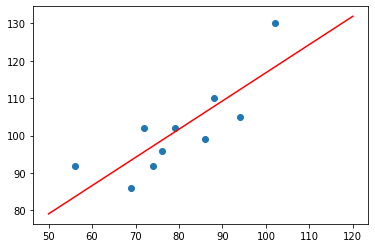

In [30]:
x_temp = np.linspace(50, 120, 100)  # 绘制直线生成的临时点

plt.scatter(x, y)
plt.plot(x_temp, x_temp * w1 + w0, "r")

从上图可以看出，拟合的效果还是不错的。那么，如果你手中有一套 150 平米的房产想售卖，获得预估报价就只需要带入方程即可：

In [38]:
f(150, w0, w1)

154.5227329816629

这里得到的预估售价约为 154 万元。这就是一个最小二乘法求解线性回归问题的完整过程。